In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!mamba install -c conda-forge rdkit


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64

In [ ]:
from rdkit import Chem

In [ ]:
import requests
import time

In [ ]:
cids = [5280443,10467,312822,2518,234096,5281416,5351506,86821,965,437080,346340,866,857,22395651,985,840,5250,5280460,4819,312827,5281,25203368,262500,5250,327232,437080,262500,312827,234096,985,5281,522740 ]

In [ ]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_cid = ",".join([ str(x) for x in cids])

url = prolog + "/compound/cid/" + str_cid + "/property/isomericsmiles/txt"
res = requests.get(url)
smiles = res.text.split()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

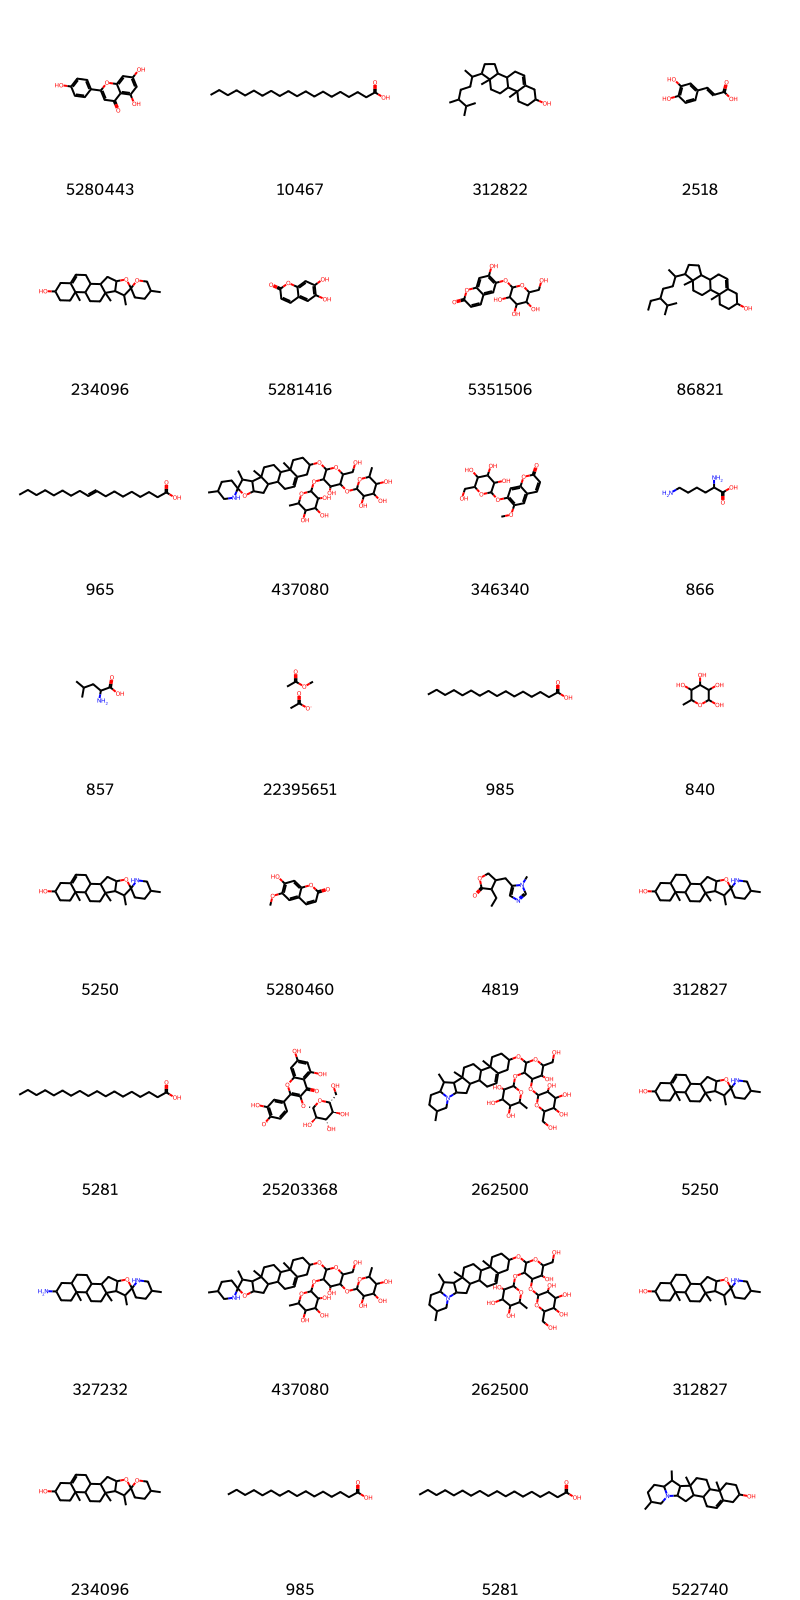

In [ ]:
mols = [ Chem.MolFromSmiles(x) for x in smiles ]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in cids] )

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
my_array = np.array(mols)

In [ ]:
# printing my_array
print (my_array)

In [ ]:
df = pd.DataFrame(mols)
print (df)

                                                   0
0   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9ba0>
1   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9cf0>
2   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9c80>
3   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9d60>
4   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9dd0>
5   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9e40>
6   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9eb0>
7   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9f20>
8   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58c9f90>
9   <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de040>
10  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de0b0>
11  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de120>
12  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de190>
13  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de200>
14  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de270>
15  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de2e0>
16  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58de350>
17  <rdkit.Chem.rdchem.Mol object at 0x7fc1a58

In [ ]:
#Find how many rows
len(df.index)

32

In [ ]:
df.dtypes

0    object
dtype: object

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

fps = [ MACCSkeys.GenMACCSKeys(x) for x in mols ]

In [ ]:
for i in range(0, len(fps)) :
    for j in range(i+1, len(fps)) :

        score = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        print(cids[i], "vs.", cids[j], ":", round(score,3), end='')

        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")

5280443 vs. 10467 : 0.125 
5280443 vs. 312822 : 0.229 
5280443 vs. 2518 : 0.484 
5280443 vs. 234096 : 0.32 
5280443 vs. 5281416 : 0.767 ***
5280443 vs. 5351506 : 0.615 *
5280443 vs. 86821 : 0.224 
5280443 vs. 965 : 0.122 
5280443 vs. 437080 : 0.294 
5280443 vs. 346340 : 0.585 *
5280443 vs. 866 : 0.133 
5280443 vs. 857 : 0.146 
5280443 vs. 22395651 : 0.176 
5280443 vs. 985 : 0.125 
5280443 vs. 840 : 0.567 *
5280443 vs. 5250 : 0.267 
5280443 vs. 5280460 : 0.688 **
5280443 vs. 4819 : 0.182 
5280443 vs. 312827 : 0.286 
5280443 vs. 5281 : 0.125 
5280443 vs. 25203368 : 0.625 *
5280443 vs. 262500 : 0.303 
5280443 vs. 5250 : 0.267 
5280443 vs. 327232 : 0.203 
5280443 vs. 437080 : 0.294 
5280443 vs. 262500 : 0.303 
5280443 vs. 312827 : 0.286 
5280443 vs. 234096 : 0.32 
5280443 vs. 985 : 0.125 
5280443 vs. 5281 : 0.125 
5280443 vs. 522740 : 0.232 
10467 vs. 312822 : 0.385 
10467 vs. 2518 : 0.171 
10467 vs. 234096 : 0.356 
10467 vs. 5281416 : 0.143 
10467 vs. 5351506 : 0.208 
10467 vs. 86821 : 0.

In [ ]:
print("Tanimoto    :", round(DataStructs.TanimotoSimilarity(fps[0], fps[1]), 4))
print("Dice        :", round(DataStructs.DiceSimilarity(fps[0], fps[1]), 4))
print("Cosine      :", round(DataStructs.CosineSimilarity(fps[0], fps[1]), 4))
print("Sokal       :", round(DataStructs.SokalSimilarity(fps[0], fps[1]), 4))
print("McConnaughey:", round(DataStructs.McConnaugheySimilarity(fps[0], fps[1]), 4))

Tanimoto    : 0.125
Dice        : 0.2222
Cosine      : 0.2236
Sokal       : 0.0667
McConnaughey: -0.55


Similarity Evaluation Using Graph Structure